# Stellar Mass Table distribution fit
*Parse table from csv file*

In [60]:
from pandas import read_csv


df = read_csv('stellar_orbital_eccentricity.csv')
df.head()

,eccentricity,p,p_moderate,p_close,p_very_close
0,0.95,0.00463,0.000000,0.000000,0.00000
1,0.90,0.01389,0.000000,0.000000,0.00000
2,0.80,0.02778,0.004630,0.000000,0.00000
3,0.70,0.11574,0.041667,0.004630,0.00000
4,0.60,0.21296,0.115741,0.041667,0.00463


## Discrete probabilities
*the p column contains probability of the dice rolls corresponding to the eccentricities*

In [61]:
x = df.eccentricity
y = df.p

y.sum()

1.0

*creating random sample of 1000 elements from given probabilities*

In [62]:
from random import choices

sample = choices(list(x), weights=list(y), k=1000)


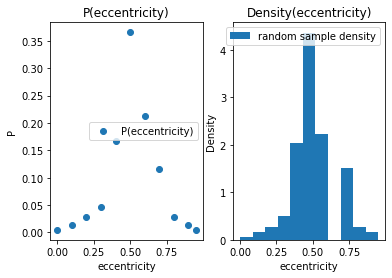

In [63]:
import matplotlib.pyplot as plt


_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(eccentricity)")
axs[0].plot(x, y, 'o', label='P(eccentricity)')
axs[0].set_xlabel('eccentricity')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(eccentricity)")
axs[1].hist(sample, density=True, bins=len(x), label='random sample density')
axs[1].set_xlabel('eccentricity')
axs[1].set_ylabel('Density')
axs[1].legend()

plt.show()

## Continuous random variable fit
*Fitting a truncated normal distribution to the random sample*

In [64]:

import numpy as np

xa, xb = x.min(), x.max()
mu = np.mean(sample)
sigma = np.std(sample)
a, b = (xa - mu) / sigma, (xb - mu) / sigma

a, b, mu, sigma 

(-3.577902273952695, 3.0093209048361813, 0.516, 0.14421858410066296)

In [65]:
from scipy.stats import truncnorm
from scipy.stats import kstest

dist = truncnorm(a, b, mu, sigma)
r = kstest(sample, [a, b, mu, sigma], 'truncnorm')
r

KstestResult(statistic=0.479, pvalue=0.22872393446792827)

*Density function from the fitted continuous random variable*

In [66]:
y_pdf =  [dist.pdf(xi) for xi in x]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [67]:
fit_sample = dist.rvs(size=10000)

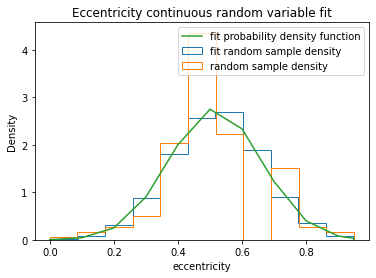

In [68]:
_, ax = plt.subplots()
ax.set_title(r"Eccentricity continuous random variable fit")
ax.hist(fit_sample, density=True, histtype='step', bins=len(x), label='fit random sample density')
ax.hist(sample, density=True, histtype='step', bins=len(x), label='random sample density')
ax.plot(x, y_pdf, '-', label='fit probability density function')
ax.set_xlabel('eccentricity')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [0, .95]*

In [69]:
all(v >= 0 and v <= .9 for v in fit_sample)

False